<h3>Обробка та аналіз БМД </h3>
  <h3>  Бондарчук Євгеній БС-82
    Лабораторна 6 
    </h3>
<h5>Парний t-критерій Стьюдента</h5>

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint
import seaborn as sns

In [2]:
data_1 = randint(0, 20, 7)
data_2 = randint(0, 20, 7)
data = pd.DataFrame({"01.03.2020": data_1, "01.04.2020": data_2,}, index = ["Porsche","Audi", "Mercedes","BMW", "Volkswagen", "Seat", "Toyota"])
data.index.name = 'Марка авто'
data

,01.03.2020,01.04.2020
Марка авто,,
Porsche,2,16
Audi,19,15
Mercedes,16,18
BMW,10,2
Volkswagen,8,15
Seat,0,18
Toyota,10,18


2.Побудувати графік, що відображає розкид даних в групах. Приклад:

[Text(0.5, 0, 'Кі-сть авто')]

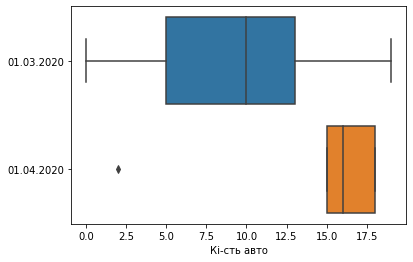

In [3]:
sns.boxplot(data = data, orient = 'h').set(xlabel = 'Кі-сть авто')

3.Написати функції:
- для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

- для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [4]:
def Pearson(x, y):
    r = ( sum(x * y) - len(x) * (sum(x)/len(x)) * (sum(y)/len(x)) ) / ( len(x) * ( ( ( sum(x**2)/len(x) - (sum(x)/len(x))**2 ) * ( sum(y**2)/len(x) - (sum(y)/len(x))**2) ) )**(1/2) )
    print("Значення коефіцієнту кореляції: " + str(r))
    df = len(x) - 2
    print("Значення ступеня свободи: " + str(df))
    critical_table = pd.read_excel("critical_table.xlsx")
    a = critical_table.loc[df - 1, 0.05]
    print("Критичне значення коефіцієнту кореляції = " + str(a))
    result = ("significant") if abs(r) > a else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return r, df, result  

In [5]:
def Student(x, y):
    difference = x - y
    M = difference.mean()
    Sigma = difference.std()
    t = (M/Sigma) * (len(x))**(1/2)
    print("Значення t-критерію Стьюдента: t = "  + str(t))
    df = len(x) - 1
    print('Значення ступеня свободи: df = ' + str(len(x) - 1))
    critical_table = pd.read_excel("critical_table.xlsx")
    a = critical_table.loc[len(x) - 2, 0.05]
    print("Критичне значення коефіцієнту Стьюдента = " + str(a))
    result = ("significant") if abs(t) > a else "not significant"
    print("Результат оцінки значимості зв'зку: " + result)
    return t, df, result


4.Перевірити розбіжність на між групами на даних з п. 1.

In [6]:
Pearson(data_1, data_2)

Значення коефіцієнту кореляції: -0.09434921725769403
Значення ступеня свободи: 5
Критичне значення коефіцієнту кореляції = 2.571
Результат оцінки значимості зв'зку: not significant


(-0.09434921725769403, 5, 'not significant')

In [7]:
Student(data_1, data_2)

Значення t-критерію Стьюдента: t = -1.6203331299627228
Значення ступеня свободи: df = 6
Критичне значення коефіцієнту Стьюдента = 2.447
Результат оцінки значимості зв'зку: not significant


(-1.6203331299627228, 6, 'not significant')

5.Сформувати висновок про взаємозв'язок між групами та про їх розбіжність.

Висновок: 

1)Під час аналізу залежності між групами за допомогою критерія Пірсона я отримав результат, який стверджує, що статистичної залежності немає.

2)Під час аналізу відмінності між групами за допомогою критерія t-Стьюдента, було прийнято нульову гіпотезу про рівність середніх.